# Sounds from signals: computing frequencies and amplitudes with the FFT. 

UNH Innovation Scholars *Patterns and Symmetry*, J. Gibson 2025-03-27.

This notebook 
  * has some background on Fourier modes, frequencies, and numerical calculations with the Fast Fourier Transform, and
  * shows how to extract frequencies and amplitudes from a signal and play them as sounds.

I don't by any means expect you to understand this all! Rather, read and take from it what you can, and
use the example calculations as a guide for how to extract frequencies and amplitudes from the moving pattern.

## Fourier series, analytic

Suppose you have a function $u(x)$ that is periodic with period $L$, i.e. $u(x+L) = u(x)$
for all $x$. Then $u(x)$ can be represented as a sum of sines and cosines in the form
\begin{align*}
u(x) = a_0 + \sum_{k=1}^{\infty} a_k \; \cos(2\pi kx/L) + b_k \; \sin(2 \pi kx/L).
\end{align*}
The functions $1$, $\cos(2\pi kx/L)$, and $\sin(2 \pi kx/L)$ called *Fourier modes*,
the coefficients $2\pi k/L$ of $x$ in the sines and cosines are the *frequencies*,
and the real-valued Fourier coefficients $a_k$s and $b_k$s are the *amplitudes* of 
the Fourier modes. When you hear tones within a chord, you're
hearing a set of nonzero amplitudes of Fourier modes at different frequencies. 

The equation above is relatively easy to understand but hard to work with. 
In the long run it's easier to re-express it in complex form. First we let 
$\alpha = 2\pi/L$ represent the fundamental frequency, and we substitute with
$\cos(\alpha k x) = \cos(2\pi kx/L)$ and similarly for $\sin$. Then we re-express 
the sines and cosines with complex exponentials using the relation 
$e^{i\alpha kx} = \cos(\alpha kx) + i \sin(\alpha kx)$. The real-valued coefficients
$a_k$ and $b_k$ combine into complex coefficients $\hat{u}_k$. After these changes 
the above equation becomes 
\begin{align*}
u(x) &= \sum_{k=-\infty}^{\infty} \hat{u}_k \; e^{i\alpha kx}.
\end{align*}
In this representation, the amplitude of a given complex Fourier mode $e^{i\alpha kx}$
at frequency $\alpha k$ is given by the magnitude of its complex coefficient, $|\hat{u}_k|$.
Assuming $u(x)$ is real-valued, the coefficients of corresponding positive/negative frequencies
$\pm \alpha k$ are complex conjugates ($\hat{u}_{-k} = \hat{u}_{k}^*$) with equal magnitudes
($|\hat{u}_{-k}| = |\hat{u}_{k}|$).

The values of the Fourier coefficients $\hat{u}_k$ for a given function $u(x)$ are determined
by the integral
\begin{align*}
\hat{u}_k &= \frac{1}{L} \int_0^L u(x) \; e^{-i\alpha kx} dx 
\end{align*}

## Fourier series, numerical

Numerical computations of Fourier transforms are done with the Fast Fourier Transform algorithm (FFT).
Rather than computing the integral above exactly, the FFT operates on a vector of values of $u(x)$ 
evaluated on a grid, and the integral above for the coefficients is approximated by a finite sum.

We start with a vector of values of $u(x)$ at $N$ evenly-spaced gridpoints on the domain $0\leq x \leq L$.
I.e. we let $u_j = u(x_j)$ for $x_j = j L/N$ where $j=0, 1, \ldots, N-1$. We approximate the above integral
with the finite sum
\begin{align*}
\hat{u}_k &= \frac{1}{L} \sum_{j=0}^{N-1} u(x_j) \; e^{-i\alpha kx_j} \Delta x
\end{align*}
where $\Delta x$ is the spacing between gridpoints. Substituting with $\Delta x = L/N$, 
$x_j=jL/N$, $\alpha = 2\pi/L$, and  $u_j = u(x_j)$ gives
\begin{align*}
\hat{u}_k &= \frac{1}{N} \sum_{j=0}^{N-1} u_j \; e^{-2\pi ijk/N} 
\end{align*}
This is what the Fast Fourier Transform calculates from a vector of values $[u_j]$.
In this equation, $k$ is an integer taking on the $N$ values $-N/2+1 \leq k \leq N/2$ for even $N$.
For reasons of algorithmic efficiency (and some theoretical issues), the FFT returns 
a vector of complex Fourier coefficients $[\hat{u}_k]$ in order $k = 0, 1, 2, \ldots, N/2, -N/2+1, -N/2+2, \ldots, -1$.
Negative frequencies are mathematical artifacts of the complex representation of the sines and cosines; 
we will only pay attention to the positive frequencies in the first half of the vector $[\hat{u}_k]$.

The magnitude of the complex Fourier coefficient, $|\hat{u}_k|$, is the amplitude of the frequency
$\alpha k$ in the original signal $u(x)$. 

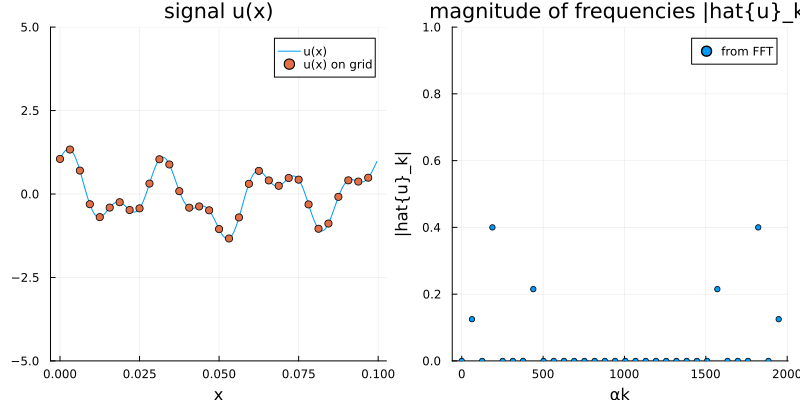

In [6]:
using FFTW, Plots

Lx = 0.1
Ngrid = 32   # gridsize for discrete Fourier transform (FFT)
Nplot = 256  # gridsize for plotting u(x)

α = 2pi/Lx

xgrid = (0:Ngrid-1)*Lx/Ngrid
xplot = (0:Nplot-1)*Lx/Nplot

# define a signal u(x) as a continuous function of x
αk = [α; 3α; 7α]        # a set of frequencies in signal
c  = [0.25; 0.8; 0.43]   # amplitudes of those frequencies

u(x) = (c[1]*cos(αk[1]*x) + c[2]*cos(αk[2]*x) + c[3]*sin(αk[3]*x))  #* exp(-0.1*x^2)

# sample u(x) on coarse grid for FFT and fine grid for plotting
ugrid = u.(xgrid)
uplot = u.(xplot)

# perform Fourier transform on ugrid = vector of gridpoint values if u(x)
# to get ufreq = vector of complex amplitudes of frequencies
uhat = (1/Ngrid)*fft(ugrid)

plot(xplot, uplot, label="u(x)")
scatter!(xgrid, ugrid, label="u(x) on grid")
p1 = plot!(xlabel="x", title="signal u(x)", ylim=(-5,5))

k = 0:Ngrid-1
#scatter(αk, c, markersize=4, markercolor=:white, label="in signal u(x)")
scatter(α*k, abs.(uhat), markersize=3, label="from FFT", ylim=(0,1))

p2 = plot!(xlabel="αk", title="magnitude of frequencies |hat{u}_k|", ylabel="|hat{u}_k|")

plot(p1,p2, size=(800,400))

In [ ]:
using Pkg; Pkg.instantiate()

## tl;dr: A function that returns the magnitudes and frequencies of a signal

Putting it all together, here's a function that puts together the above calculations
and returns the power spectrum of a given signal. The power (energy transmission per
unit time) of a signal at a given frequency is proportional to the square of the magnitude
of that frequency. I'll follow this convention and make the function return the square of
the magnitude of each frequency.

In [7]:
"
    power, freq = powerspectrum(u, x)

Inputs are u, a vector of signal values evaluated on a vector of evenly spaced gridpoints
and x, a vector of evenly spaced gridpoints. Componentwise, u[j] = u(x[j]). 

Outputs are power, a vector of squared magnitudes, and freq, a vector of frequencies. 
power[j] is the squared magnitude of the signal at frequency freq[j]
"

function powerspectrum(u, x)
    Nx = length(x)
    Lx = (x[end] - x[1])*(Nx/(Nx-1))
    α = 2pi/Lx
 
    # perform Fourier transform on ugrid = vector of gridpoint values if u(x)
    # to get uhat = vector of complex amplitudes of frequencies
    uhat = (1/Nx)*fft(ugrid)

    # just consider positive frequencies (negatives have same magnitude since signal is real)
    Nfreq = Ngrid÷2
    k = 0:Nfreq-1

    # compute power[k] = |uhat[k]|^2
    # and     freq[k]  = α k 
    power = abs.(2*uhat).^2  # factor of two to include equal negative frequencies
    power[1] = abs(uhat[1])^2          # remove factor of 2 for frequency-zero mode, which has no negative counterpart
    freq = α*k

    return power, freq
end

using FFTW

Below we use the `powerspectrum` function to make the same plots as above for a given signal.

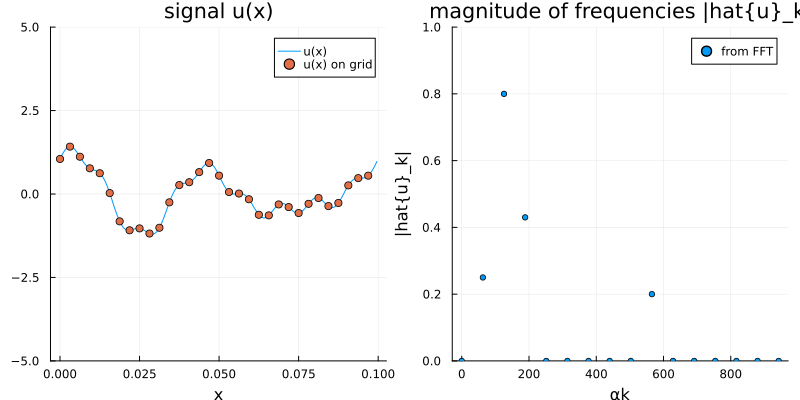

In [8]:
Lx = 0.1
Ngrid = 32   # gridsize for discrete Fourier transform (FFT)
Nplot = 256  # gridsize for plotting u(x)

α = 2pi/Lx

# define a signal u(x) as a continuous function of x
αk = [α; 2α; 3α; 9α]         # a set of frequencies in signal
c  = [0.25; 0.8; 0.43; 0.2]   # amplitudes of those frequencies

u(x) = (c[1]*cos(αk[1]*x) + c[2]*cos(αk[2]*x) + c[3]*sin(αk[3]*x) + c[4]*sin(αk[4]*x))  #* exp(-0.1*x^2)

# sample u(x) on coarse grid for computing power spectrum
xgrid = (0:Ngrid-1)*Lx/Ngrid
ugrid = u.(xgrid)

# compute power spectrum of signal discretized on coarse grid
power, freq = powerspectrum(ugrid, xgrid)
magn = sqrt.(power)

# make plots of signal and spectrum

xplot = (0:Nplot-1)*Lx/Nplot
uplot = u.(xplot)

plot(xplot, uplot, label="u(x)")
scatter!(xgrid, ugrid, label="u(x) on grid")
p1 = plot!(xlabel="x", title="signal u(x)", ylim=(-5,5))

plot(xplot, uplot, label="u(x)")
scatter!(xgrid, ugrid, label="u(x) on grid")
p1 = plot!(xlabel="x", title="signal u(x)", ylim=(-5,5))


scatter(freq, magn, markersize=3, label="from FFT", ylim=(0,1))

p2 = plot!(xlabel="αk", title="magnitude of frequencies " * "|hat{u}_k|", ylabel="|hat{u}_k|")

plot(p1,p2, size=(800,400))


 ## Play the powerspectrum as a sound

 The code below takes the discretized signal from a previous cell,
 computes its power spectrum, and then plays tones associated
 with the loudest N frequencies in the signal. 

In [14]:
using Sound

N = 3  # play the N largest-magnitude frequencies in signal
S = 8192 # sampling rate in Hz

# recompute power spectrum of signal discretized on coarse grid
power, freq = powerspectrum(ugrid, xgrid)
magn = sqrt.(power)

# sort and reorder spectrum by magnitude
I = sortperm(magn, rev=true)
magn = magn[I]
freq = freq[I]

# rebuild a signal from the top N frequencies and their magnitudes
S2 = S÷2
t = 2π*(1:S2)/S
snd = zeros(S2)
for i in 1:N
    snd += magn[i]*cos.(freq[i]*t)
end

sound(0.5*snd, S) # monophonic


4096

In [5]:
Lx = 0.1
Ngrid = 32   # gridsize for discrete Fourier transform (FFT)
Nplot = 256  # gridsize for plotting u(x)

α = 2pi/Lx

xgrid = (0:Ngrid-1)*Lx/Ngrid

# define a signal u(x) as a continuous function of x
αk = [2α; (2+2*sqrt(12))*α; 7α]        # a set of frequencies in signal
c  = [0; 0; 0]   # amplitudes of those frequencies

u(x) = (c[1]*cos(αk[1]*x) + c[2]*cos(αk[2]*x) + c[3]*sin(αk[3]*x))  #* exp(-0.1*x^2)

# sample u(x) on coarse grid for FFT and fine grid for plotting
ugrid = u.(xgrid)
ugrid *= 0

N = 2  # play the N largest-magnitude frequencies in signal
S = 8192 # sampling rate in Hz

# recompute power spectrum of signal discretized on coarse grid
power, freq = powerspectrum(ugrid, xgrid)
magn = sqrt.(power)

# sort and reorder spectrum by magnitude
I = sortperm(magn, rev=true)
magn = magn[I]
freq = freq[I]

# rebuild a signal from the top N frequencies and their magnitudes
Nseconds = 3
S2 = S÷2
t = 2π*(1:S2)/(S)
snd = zeros(S2)
for i in 1:N
    snd += magn[i]*cos.(freq[i]*t)
end

sound(0.5*snd, S) # monophonic


LoadError: BoundsError: attempt to access 16-element StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64} at index [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  23, 24, 25, 26, 27, 28, 29, 30, 31, 32]]

In [32]:
freq[1:3]

3-element Vector{Float64}:
 188.49555921538757
 439.822971502571
  62.83185307179586

In [33]:
magn[1:3]

3-element Vector{Float64}:
 0.7999999999999998
 0.43
 0.24999999999999967